# Collatz Conjecture Paths

## Introduction
The **Collatz Conjecture** (also known as the *3n + 1 problem*) is a famous unsolved mathematical question. 
It proposes that starting from any positive integer, repeatedly applying the rule  
- if n is even → divide it by 2  
- if n is odd → multiply it by 3 and add 1  
will eventually reach 1.

In this notebook, I explore this conjecture visually — not to prove it, but to see how the sequences behave when drawn geometrically.
This idea was inspired by [Numberphile's video on the Collatz Conjecture](https://www.youtube.com/watch?v=5mFpVDpKX70) 
and by Project Euler problem #14.

I began by drawing these paths with Python’s **turtle** module but switched to **Matplotlib** for finer line control and higher resolution output.


## Implementation
We start by importing standard numerical and plotting libraries and defining a few helper functions.

- `collatz(num)` computes the Collatz sequence for a given number.  
- `move_forward(x, y, angle, distance)` simulates a basic turtle step.  
- `draw_seq(arr)` uses geometric rules to trace Collatz paths.

The approach:
- Generate 5,000 random starting numbers between 2 and 1,000,000.
- For each sequence, draw a path from the origin.
- Turn **left 8.65°** when the next number is even, and **right 16°** when it’s odd.
- The step length decreases with distance, defined as `1 / log(idx)`.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
import random

In [ ]:
def collatz(num):
    ''' Takes num and returns sequence of numbers to reach 1 in reverse order 
    so it is ready to draw. Does not include 1.
    '''
    arr = []
    arr.append(num)
    while num != 1:
        if num % 2 == 0:
            num = num / 2
        else:
            num = 3*num + 1
        arr.append(int(num))
    arr.pop()
    arr.reverse()
    return arr

In [ ]:
def move_forward(x, y, angle, distance):
    # Function to move like a turtle
    new_x = x + distance * np.cos(np.radians(angle))
    new_y = y + distance * np.sin(np.radians(angle))
    return new_x, new_y

In [ ]:
# Chooses 5000 random numbers between 2 and 1e6 which will be turned into Collatz sequences. 
numbers = random.sample(range(2, 1000000), 5000)

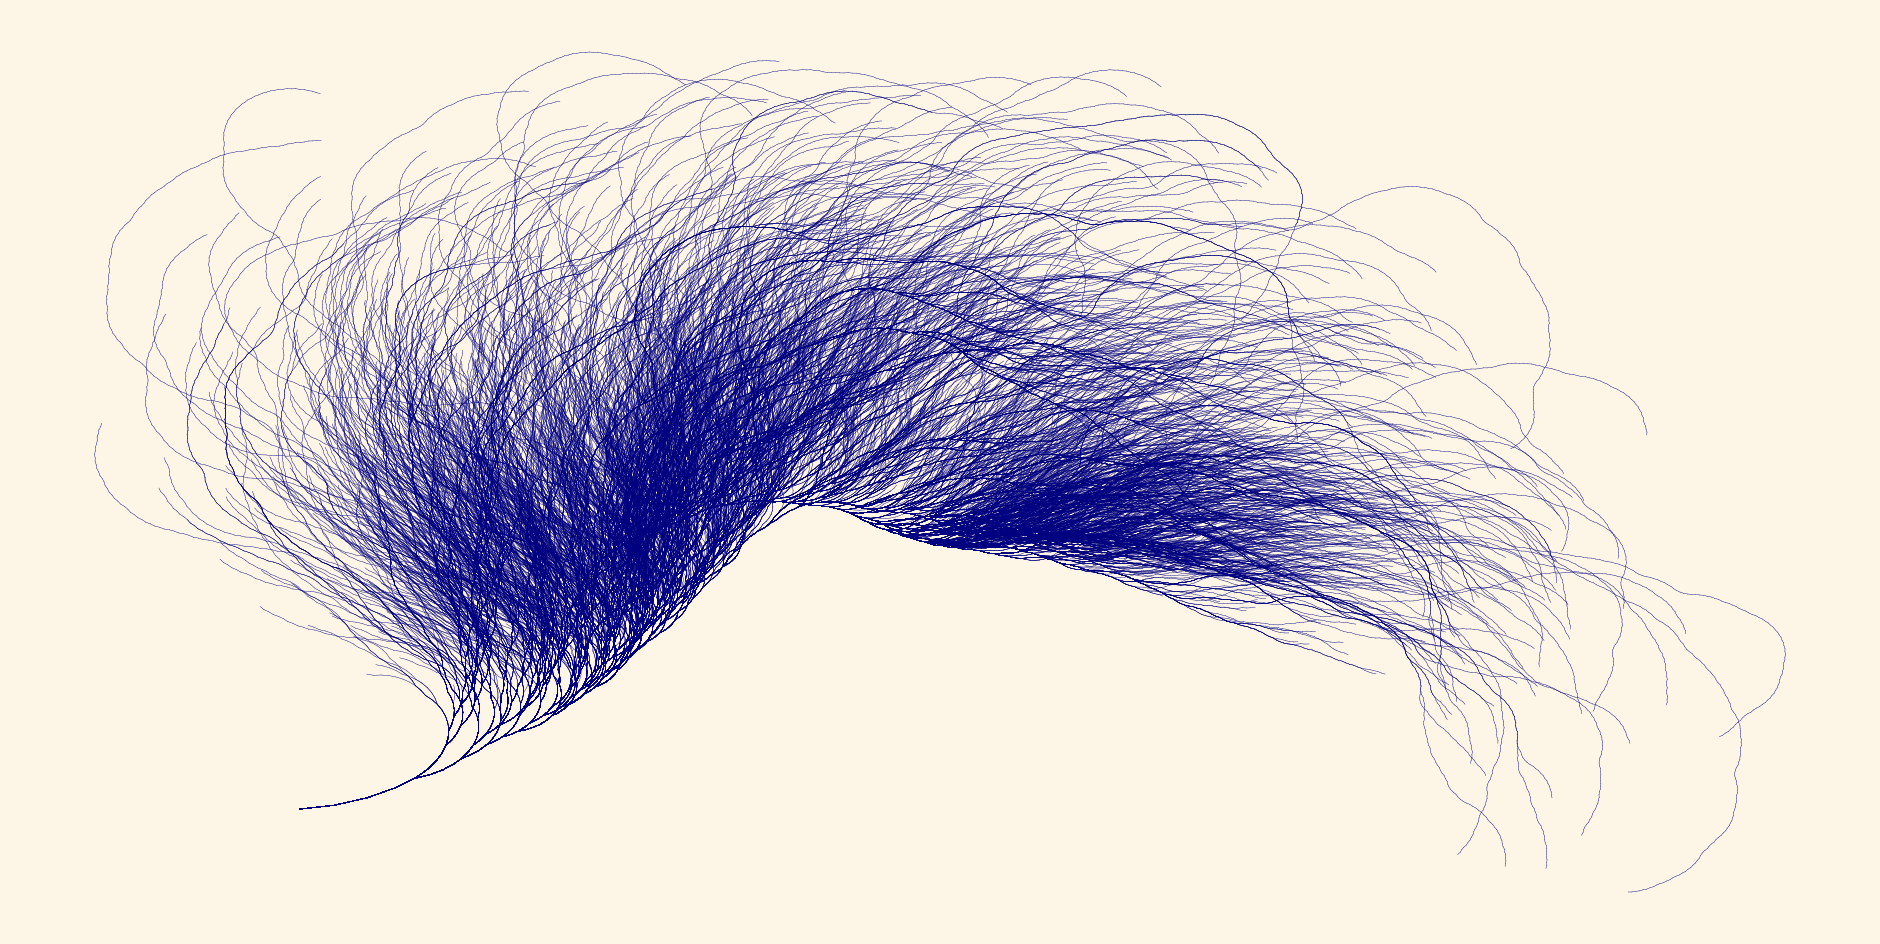

In [ ]:
fig, ax = plt.subplots(figsize=(24, 12))
fig.patch.set_facecolor('#FDF5E6')

def draw_seq(arr):
    '''
    Each sequence starts at [0,0] with initial angle set to 0.
    The length of each line is 1/log(x) where x is number of nodes from origin.
    Turns left 8.65 degrees if next number in sequence is even else 16 degrees right.
    '''
    angle = 0
    x, y  = 0, 0
    lmb = lambda idx: 1.5 if idx < 2 else 1 / (log(idx))
    for idx, num in enumerate(arr):
        dist = lmb(idx)
        if num % 2 == 0:
            angle += 8.65
            new_x, new_y = move_forward(x, y, angle, dist)
        else:
            angle -= 16
            new_x, new_y = move_forward(x, y, angle, dist)
        ax.plot([x, new_x], [y, new_y], linewidth=0.3, color='navy')
        x, y = new_x, new_y
    x, y = 0, 0

for num in numbers:
    arr = collatz(num)
    draw_seq(arr)

# plt.savefig("collatz.svg", format="svg") # uncomment to save paths as svg
plt.axis('off')
plt.show()
# This takes about 3 minutes to calculate.
# Each output will look slightly different because numbers were chosen randomly.
# There's 10**21253 ways to choose 5k out of 1M so each output is guaranteed to be unique.  

## Results

Above is the visualisation of 5,000 Collatz sequences.
Each path begins at the origin and turns left or right depending on whether the next number in the sequence is even or odd.

The figure was rendered with very thin lines (0.3px) on a soft background (`#FDF5E6`) for a parchment-like aesthetic.


## Reflection

This experiment demonstrates how simple deterministic rules can generate complex and beautiful structures.  
While the Collatz Conjecture remains unproven, its visualisation helps reveal its hidden order.

